<a href="https://colab.research.google.com/github/siddhant-varma/AI-For-Beginners/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#               to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
#Import the libraries
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime as dt 
import yfinance as yfin
plt.style.use('fivethirtyeight')
yfin.pdr_override()

In [3]:
#!pip install --upgrade pandas-datareader

#!pip install --upgrade pandas
#!pip install yfinance

In [5]:
#Get the stock quote

#start = dt.datetime(2013, 1, 1)
#end = dt.datetime(2023, 1, 13)
df = web.get_data_yahoo("AAPL",start='2012-01-01',end='2023-01-10')

#Show data sample
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726296,271269600
2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859330,318292800
2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838936,394024400
...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,130.279999,130.899994,124.169998,125.070000,125.070000,112117500
2023-01-04 00:00:00-05:00,126.889999,128.660004,125.080002,126.360001,126.360001,89113600
2023-01-05 00:00:00-05:00,127.129997,127.769997,124.760002,125.019997,125.019997,80962700


In [6]:
#Get rows and numbers of Data set
df.shape

(2773, 6)

<function matplotlib.pyplot.show(*args, **kw)>

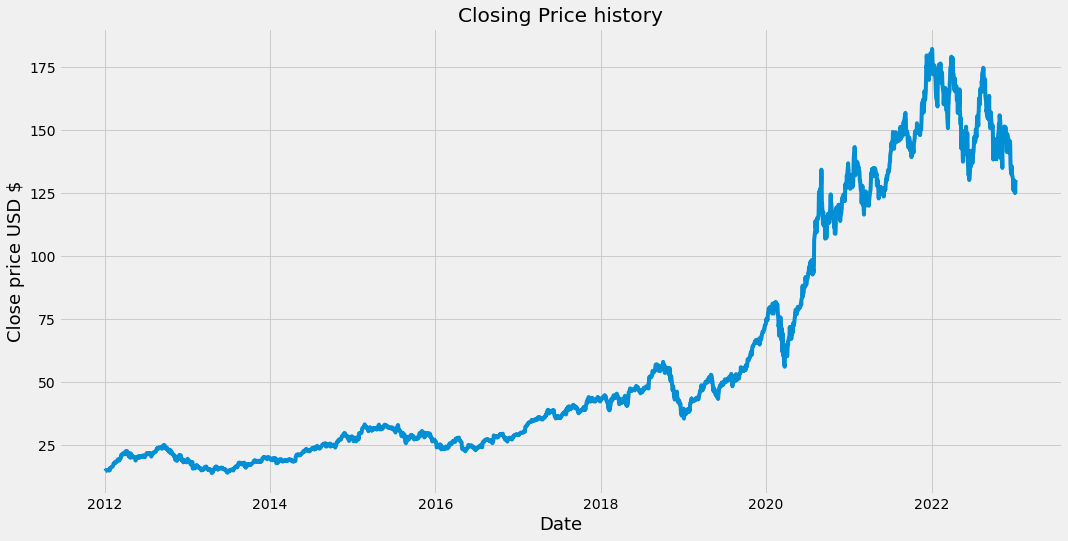

In [7]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD $',fontsize=18)
plt.show()

In [8]:
#Create dataframe with only Close Prices
data=df.filter(['Close'])
#Convert the dataframe to numpy array
dataset= data.values
#Get #rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2219

In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.66089996],
       [0.68827073],
       [0.69142431]])

In [11]:
#Create training dataset
#create scaled training dataset

train_data = scaled_data[0:training_data_len, : ]
#split the data into x_train & y_train
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [15]:
#Convert X-train & y_train to numpay arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [17]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2159, 60, 1)

In [19]:
#Build the LSTM MODEL
model= Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2159/2159 [==============================] - 62s 27ms/step - loss: 5.1248e-04


In [22]:
#Create the testing data set
#Create new array containing scaled values from index 2159 to end
test_data=scaled_data[training_data_len-60: , : ]

#Create data sets x_test & y_test
x_test = []
y_test = dataset[training_data_len : , : ]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60 : i, 0])
  


In [23]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [24]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [25]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 17ms/step


In [26]:
#Evaluate the model - Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

21.326539117395356

<ipython-input-27-69283fbcf005>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


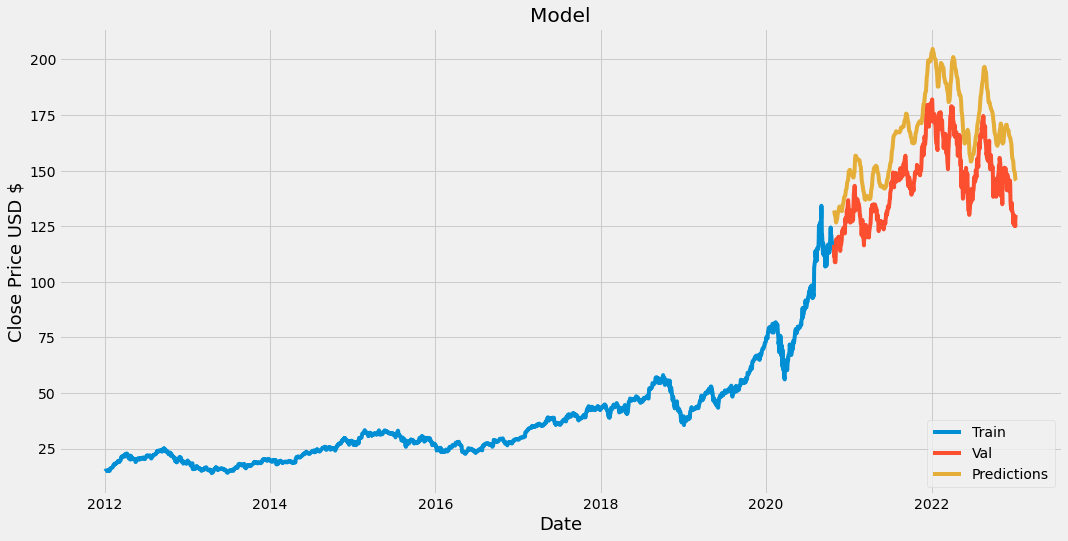

In [27]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions

#Visualize the model
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [28]:
#Show the valid & predicted prices
valid

,Close,Predictions
Date,,
2020-10-27 00:00:00-04:00,116.599998,132.063339
2020-10-28 00:00:00-04:00,111.199997,131.676880
2020-10-29 00:00:00-04:00,115.320000,130.804962
2020-10-30 00:00:00-04:00,108.860001,130.285767
2020-11-02 00:00:00-05:00,108.769997,129.204346
...,...,...
2023-01-03 00:00:00-05:00,125.070000,149.306763
2023-01-04 00:00:00-05:00,126.360001,148.101685
2023-01-05 00:00:00-05:00,125.019997,147.039291


In [29]:
#Get the quote
apple_quote = web.get_data_yahoo('AAPL',start='2012-01-1', end='2023-01-10')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values & convert dataframe to array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create empty list
X_test = []
#Append past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 38ms/step
[[145.56616]]


In [34]:
#Get the quote
apple_quote2 = web.get_data_yahoo('AAPL',start='2023-01-11', end='2023-01-12')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-01-11 00:00:00-05:00    133.490005
Name: Close, dtype: float64
